In [1]:
##################################
### Import the usual libraries ###
##################################

### Numpy
import numpy as np

### Astropy
import astropy

#Astropy FITS/Table handling
from astropy.io import fits, ascii
from astropy.table import Table, Column

#astropy coorindates/units
from astropy.coordinates import SkyCoord
import astropy.constants as const
import astropy.units as u

### Pandas
# import pandas as pd

### Matplotlib
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
# matplotlib.rcParams.update({'font.size': 18}) #make plots more readable
import matplotlib.patches as mpatches
from matplotlib.ticker import MultipleLocator, FormatStrFormatter, AutoMinorLocator
from matplotlib.offsetbox import AnchoredText
matplotlib.rcParams.update({'font.size': 30})

# ### Yumi's RA/DEC ---> Magellanic Stream Coorindates
# import MagellanicStream as ms

# ### Functions used in this code
# import age_functions as afunc

## Stuff Writtten by A Really Cool Professor
import dlnpyutils as dlpu

###
import linearfitting as linfit
import geometry as geo

import mlefitting as mlefit
import olsfitting as olsfit
import utilities as util

### Other
import warnings
warnings.filterwarnings('ignore')

from tqdm import tqdm_notebook

### Age of Universe
H0 = 74.03*(u.km/u.s)/u.Mpc
hertz = H0.to(u.km/u.s/u.pc).to(u.km/u.s/u.km)
tage = (1/hertz).to(u.yr)
ageU = tage.value

In [2]:
#######################
### Import SMC Data ###
#######################

#total number 1225
smc = fits.getdata('/Users/joshpovick/Desktop/Research/SMC_Gradients/smc_rgbmembers.r13-l33-58932beta.fits.gz') 

cln = np.where((smc['FE_H']>-9999.0)&(smc['AK_TARG']>-9999.0)&(smc['LOGG']>0.0)&
               (smc['FE_H_ERR']>-90.0)&(smc['C_FE']>-9999.0)&(smc['N_FE']>-9999.0))

#total number 990
smc = smc[cln]

## Find Bloop
bloop = np.where((smc['H']<=13.25)&(smc['J']-smc['K']<=0.95)&(smc['TEFF']>=4175))
bloop_cut = []
for i in range(len(smc)):
    if i not in np.squeeze(bloop).tolist():
        bloop_cut.append(i)
        
smc_nobloop = smc[bloop_cut]

In [3]:
#########################
### Import Isochrones ###
#########################

parsecall = ascii.read('/Users/joshpovick/Desktop/Research/SMC_Gradients/parsec3_3.dat', \
                    format='basic', delimiter='\s')

parsec = parsecall[np.where(parsecall['label']==3)]

In [4]:
####################################
### Gaia Query Using Online Form ###
####################################

# (00:52:44, −72:49:42) Used in SMASH
center = SkyCoord('00:52:44 -72:49:42', unit=(u.hourangle, u.deg))

print('''Cone search center: {} with radius 6.5 deg'''.format(center))

smc_gaia = fits.getdata('smc_apogee-result.fits.gz')
cln = np.where((smc_gaia['astrometric_excess_noise']<1.0)&(np.isfinite(smc_gaia['phot_g_mean_mag'])==True)&
               (np.isfinite(smc_gaia['phot_g_mean_mag'])==True)&(np.isfinite(smc_gaia['phot_bp_mean_mag'])==True)&
               (np.isfinite(smc_gaia['phot_rp_mean_mag'])==True)&(smc_gaia['parallax']<0.2)&
               (smc_gaia['parallax']>-0.2)&(smc_gaia['pmra']>=-3.0)&(smc_gaia['pmra']<=3.0)&
               (smc_gaia['pmdec']>=-3.0)&(smc_gaia['pmdec']<=3.0)&(smc_gaia['phot_g_mean_flux_over_error']>5.0)&
               (smc_gaia['phot_bp_mean_flux_over_error']>5.0)&(smc_gaia['phot_rp_mean_flux_over_error']>5.0))
smc_gaia = smc_gaia[cln]

# cuts from  

# @ARTICLE{2020MNRAS.tmp.3030O,
#        author = {{Omkumar}, Abinaya O. and {Subramanian}, Smitha and
#          {Niederhofer}, Florian and {Diaz}, Jonathan and {Cioni}, Maria-Rosa L. and
#          {El Youssoufi}, Dalal and {Bekki}, Kenji and {de Grijs}, Richard and
#          {van Loon}, Jacco Th},
#         title = "{Gaia view of a stellar sub-structure in front of the Small Magellanic Cloud}",
#       journal = {\mnras},
#      keywords = {Magellanic Clouds, galaxies: interactions, proper motions, stars: kinematics and dynamics, Astrophysics - Astrophysics of Galaxies},
#          year = 2020,
#         month = oct,
#           doi = {10.1093/mnras/staa3085},
# archivePrefix = {arXiv},
#        eprint = {2010.02687},
#  primaryClass = {astro-ph.GA},
#        adsurl = {https://ui.adsabs.harvard.edu/abs/2020MNRAS.tmp.3030O},
#       adsnote = {Provided by the SAO/NASA Astrophysics Data System}
# }

Cone search center: <SkyCoord (ICRS): (ra, dec) in deg
    (13.18333333, -72.82833333)> with radius 6.5 deg


In [5]:
### Individual APOGEE Fields

tuc47 = np.where(smc_nobloop['FIELD']=='47TUC')
tuc47 = smc_nobloop[tuc47]

n362 = np.where(smc_nobloop['FIELD']=='N362')
n362 = smc_nobloop[n362]

smc1 = np.where(smc_nobloop['FIELD']=='SMC1')
smc1 = smc_nobloop[smc1]

smc2 = np.where(smc_nobloop['FIELD']=='SMC2')
smc2 = smc_nobloop[smc2]

smc3 = np.where(smc_nobloop['FIELD']=='SMC3')
smc3 = smc_nobloop[smc3]

smc4 = np.where(smc_nobloop['FIELD']=='SMC4')
smc4 = smc_nobloop[smc4]

smc5 = np.where(smc_nobloop['FIELD']=='SMC5')
smc5 = smc_nobloop[smc5]

smc6 = np.where(smc_nobloop['FIELD']=='SMC6')
smc6 = smc_nobloop[smc6]

smc7 = np.where(smc_nobloop['FIELD']=='SMC7')
smc7 = smc_nobloop[smc7]

In [6]:
def tan_dist(mu,mu0,d0):
    '''
    Calculate the kinematic distance to a star assuming all stars have the same tangential velocity
    
    Inputs:
    ------
        mu: proper motion magnitude
        d0: ref distance
        mu0: ref proper motion magnitude in units of mu
        
    Output:
    ------
        d: distance to star in the same units of d0
    '''
    
    d = d0*np.divide(mu0,mu)
    
    return d

In [7]:
### Calculate the Distances for stars field-by-field

### Invenio RC
rc_cut = np.where((smc_gaia['bp_rp']>0.65)&(smc_gaia['bp_rp']<1.25)&(smc_gaia['phot_g_mean_mag']>18.8)
                  &(smc_gaia['phot_g_mean_mag']<19.7))
rc_gaia = smc_gaia[rc_cut]

rc_pmmag = np.sqrt(rc_gaia['pmra']**2+rc_gaia['pmdec']**2)
rc_pmmag_error = util.mad(rc_pmmag)

rc_cen = np.where((rc_gaia['ra']>12.68333333)&(rc_gaia['ra']<13.68333333)&
                  (rc_gaia['dec']>-73.32833333)&(rc_gaia['dec']<-72.32833333))

In [21]:
# ### Calculo distantias
# dist_smc = tan_dist(np.sqrt(smc_nobloop['GAIA_PMRA']**2+smc_nobloop['GAIA_PMDEC']**2),
#                      mu0=np.nanmedian(rc_pmmag[rc_cen]),d0=60.)
# dist47 = tan_dist(np.sqrt(tuc47['GAIA_PMRA']**2+tuc47['GAIA_PMDEC']**2),
#                    mu0=np.nanmedian(rc_pmmag[rc_cen]),d0=60.)
# dist362 = tan_dist(np.sqrt(n362['GAIA_PMRA']**2+n362['GAIA_PMDEC']**2),
#                    mu0=np.nanmedian(rc_pmmag[rc_cen]),d0=60.)
# dist1 = tan_dist(np.sqrt(smc1['GAIA_PMRA']**2+smc1['GAIA_PMDEC']**2),
#                    mu0=np.nanmedian(rc_pmmag[rc_cen]),d0=60.)
# dist2 = tan_dist(np.sqrt(smc2['GAIA_PMRA']**2+smc2['GAIA_PMDEC']**2),
#                    mu0=np.nanmedian(rc_pmmag[rc_cen]),d0=60.)
# dist3 = tan_dist(np.sqrt(smc3['GAIA_PMRA']**2+smc3['GAIA_PMDEC']**2),
#                    mu0=np.nanmedian(rc_pmmag[rc_cen]),d0=60.)
# dist4 = tan_dist(np.sqrt(smc4['GAIA_PMRA']**2+smc4['GAIA_PMDEC']**2),
#                    mu0=np.nanmedian(rc_pmmag[rc_cen]),d0=60.)
# dist5 = tan_dist(np.sqrt(smc5['GAIA_PMRA']**2+smc5['GAIA_PMDEC']**2),
#                    mu0=np.nanmedian(rc_pmmag[rc_cen]),d0=60.)
# dist6 = tan_dist(np.sqrt(smc6['GAIA_PMRA']**2+smc6['GAIA_PMDEC']**2),
#                    mu0=np.nanmedian(rc_pmmag[rc_cen]),d0=60.)
# dist7 = tan_dist(np.sqrt(smc7['GAIA_PMRA']**2+smc7['GAIA_PMDEC']**2),
#                    mu0=np.nanmedian(rc_pmmag[rc_cen]),d0=60.)

In [8]:
d0 = 60
dist_dist = []
for i in tqdm_notebook(range(len(smc_nobloop)),desc='Star'):
    mu = np.sqrt(smc_nobloop['GAIA_PMRA'][i]**2+smc_nobloop['GAIA_PMDEC'][i]**2)
    
    calc_dist = []
    for j in tqdm_notebook(range(100),desc='Iteration',leave=False):
        rc_pmmag_new = util.add_noise(rc_pmmag,rc_pmmag_error) 
        d = tan_dist(mu,np.median(rc_pmmag_new),d0)
#         d = tan_dist(mu,np.median(rc_pmmag),d0) + 1000*util.add_noise(0,27)/(4.74*mu)
        calc_dist.append(d)
        
    dist_dist.append(calc_dist)
    
dis = []
dis_err = []

for i in range(len(dist_dist)):
    dis.append(np.median(dist_dist[i]))
    dis_err.append(util.mad(dist_dist[i]))

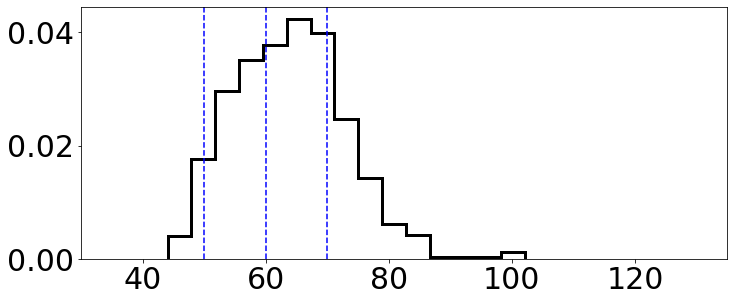

In [9]:
# dist_list = [tuc47dis,n362dis,smc1dis,smc2dis,smc3dis,smc4dis,smc5dis,smc6dis,smc7dis]
# dist_label = ['47 Tuc','NGC 362','SMC 1','SMC 2','SMC 3','SMC 4','SMC 5','SMC 6','SMC 7']

plt.figure(figsize=[10,4])
plt.hist(dis,density=True,bins=15,histtype='step',lw=3.0,color='k',label='{Total SMC}')
    
#     ax[i].set_ylim(top=0.07)
plt.xlim(30,135)
    
# #     ax[i].legend(loc='upper right')
#     ax[i].set_title(r'{}'.format(dist_label[i]))
    
plt.axvline(50,ls='--',c='b')
plt.axvline(60,ls='--',c='b')
plt.axvline(70,ls='--',c='b')
    
#     if i == 0:
#         ax[i].text(100,0.04,r'$d = \frac{v_t}{4.74|\vec{\mu}|}$')
#         ax[i].text(100,0.02,r'$d = d_0 \frac{|\vec{\mu}_0|}{|\vec{\mu}|}$')

plt.tight_layout(pad=0.)

# plt.savefig('disttan.pdf',bbox_inches='tight')
plt.show()

In [10]:
### 47TUC
tuc47_dist = []
for i in tqdm_notebook(range(len(tuc47)),desc='Star'):
    mu = np.sqrt(tuc47['GAIA_PMRA'][i]**2+tuc47['GAIA_PMDEC'][i]**2)
    
    calc_dist = []
    for j in tqdm_notebook(range(100),desc='Iteration',leave=False):
        rc_pmmag_new = util.add_noise(rc_pmmag,rc_pmmag_error) 
        d = tan_dist(mu,np.median(rc_pmmag_new),d0)
#         d = tan_dist(mu,np.median(rc_pmmag),d0) + 1000*util.add_noise(0,27)/(4.74*mu)
        calc_dist.append(d)
        
    tuc47_dist.append(calc_dist)
    
tuc47dis = []
tuc47dis_err = []

for i in range(len(tuc47_dist)):
    tuc47dis.append(np.median(tuc47_dist[i]))
    tuc47dis_err.append(util.mad(tuc47_dist[i]))
    
### N362
n362_dist = []
for i in tqdm_notebook(range(len(n362)),desc='Star'):
    mu = np.sqrt(n362['GAIA_PMRA'][i]**2+n362['GAIA_PMDEC'][i]**2)
    
    calc_dist = []
    for j in tqdm_notebook(range(100),desc='Iteration',leave=False):
        rc_pmmag_new = util.add_noise(rc_pmmag,rc_pmmag_error)
        d = tan_dist(mu,np.median(rc_pmmag_new),d0)
#         d = tan_dist(mu,np.median(rc_pmmag),d0) + 1000*util.add_noise(0,27)/(4.74*mu)
        calc_dist.append(d)
        
    n362_dist.append(calc_dist)
    
n362dis = []
n362dis_err = []

for i in range(len(n362_dist)):
    n362dis.append(np.median(n362_dist[i]))
    n362dis_err.append(util.mad(n362_dist[i]))
    
### SMC1
smc1_dist = []
for i in tqdm_notebook(range(len(smc1)),desc='Star'):
    mu = np.sqrt(smc1['GAIA_PMRA'][i]**2+smc1['GAIA_PMDEC'][i]**2)
    
    calc_dist = []
    for j in tqdm_notebook(range(100),desc='Iteration',leave=False):
        rc_pmmag_new = util.add_noise(rc_pmmag,rc_pmmag_error)
        d = tan_dist(mu,np.median(rc_pmmag_new),d0)
#         d = tan_dist(mu,np.median(rc_pmmag),d0) + 1000*util.add_noise(0,27)/(4.74*mu)
        calc_dist.append(d)
        
    smc1_dist.append(calc_dist)
    
smc1dis = []
smc1dis_err = []

for i in range(len(smc1_dist)):
    smc1dis.append(np.median(smc1_dist[i]))
    smc1dis_err.append(util.mad(smc1_dist[i]))

### SMC2
smc2_dist = []
for i in tqdm_notebook(range(len(smc2)),desc='Star'):
    mu = np.sqrt(smc2['GAIA_PMRA'][i]**2+smc2['GAIA_PMDEC'][i]**2)
    
    calc_dist = []
    for j in tqdm_notebook(range(100),desc='Iteration',leave=False):
        rc_pmmag_new = util.add_noise(rc_pmmag,rc_pmmag_error)
        d = tan_dist(mu,np.median(rc_pmmag_new),d0)
#         d = tan_dist(mu,np.median(rc_pmmag),d0) + 1000*util.add_noise(0,27)/(4.74*mu)
        calc_dist.append(d)
        
    smc2_dist.append(calc_dist)
    
smc2dis = []
smc2dis_err = []

for i in range(len(smc2_dist)):
    smc2dis.append(np.median(smc2_dist[i]))
    smc2dis_err.append(util.mad(smc2_dist[i]))
    
### SMC3
smc3_dist = []
for i in tqdm_notebook(range(len(smc3)),desc='Star'):
    mu = np.sqrt(smc3['GAIA_PMRA'][i]**2+smc3['GAIA_PMDEC'][i]**2)
    
    calc_dist = []
    for j in tqdm_notebook(range(100),desc='Iteration',leave=False):
        rc_pmmag_new = util.add_noise(rc_pmmag,rc_pmmag_error)
        d = tan_dist(mu,np.median(rc_pmmag_new),d0)
#         d = tan_dist(mu,np.median(rc_pmmag),d0) + 1000*util.add_noise(0,27)/(4.74*mu)
        calc_dist.append(d)
        
    smc3_dist.append(calc_dist)
    
smc3dis = []
smc3dis_err = []

for i in range(len(smc3_dist)):
    smc3dis.append(np.median(smc3_dist[i]))
    smc3dis_err.append(util.mad(smc3_dist[i]))
    
### SMC4
smc4_dist = []
for i in tqdm_notebook(range(len(smc4)),desc='Star'):
    mu = np.sqrt(smc4['GAIA_PMRA'][i]**2+smc4['GAIA_PMDEC'][i]**2)
    
    calc_dist = []
    for j in tqdm_notebook(range(100),desc='Iteration',leave=False):
        rc_pmmag_new = util.add_noise(rc_pmmag,rc_pmmag_error)
        d = tan_dist(mu,np.median(rc_pmmag_new),d0)
#         d = tan_dist(mu,np.median(rc_pmmag),d0) + 1000*util.add_noise(0,27)/(4.74*mu)
        calc_dist.append(d)
        
    smc4_dist.append(calc_dist)
    
smc4dis = []
smc4dis_err = []

for i in range(len(smc4_dist)):
    smc4dis.append(np.median(smc4_dist[i]))
    smc4dis_err.append(util.mad(smc4_dist[i]))

### SMC5
smc5_dist = []
for i in tqdm_notebook(range(len(smc5)),desc='Star'):
    mu = np.sqrt(smc5['GAIA_PMRA'][i]**2+smc5['GAIA_PMDEC'][i]**2)
    
    calc_dist = []
    for j in tqdm_notebook(range(100),desc='Iteration',leave=False):
        rc_pmmag_new = util.add_noise(rc_pmmag,rc_pmmag_error)
        d = tan_dist(mu,np.median(rc_pmmag_new),d0)
#         d = tan_dist(mu,np.median(rc_pmmag),d0) + 1000*util.add_noise(0,27)/(4.74*mu)
        calc_dist.append(d)
        
    smc5_dist.append(calc_dist)
    
smc5dis = []
smc5dis_err = []

for i in range(len(smc5_dist)):
    smc5dis.append(np.median(smc5_dist[i]))
    smc5dis_err.append(util.mad(smc5_dist[i]))

In [11]:
### SMC6
smc6_dist = []
for i in tqdm_notebook(range(len(smc6)),desc='Star'):
    mu = np.sqrt(smc6['GAIA_PMRA'][i]**2+smc6['GAIA_PMDEC'][i]**2)
    
    calc_dist = []
    for j in tqdm_notebook(range(100),desc='Iteration',leave=False):
        rc_pmmag_new = util.add_noise(rc_pmmag,rc_pmmag_error)
        d = tan_dist(mu,np.median(rc_pmmag_new),d0)
#         d = tan_dist(mu,np.median(rc_pmmag),d0) + 1000*util.add_noise(0,27)/(4.74*mu)
        calc_dist.append(d)
        
    smc6_dist.append(calc_dist)
    
smc6dis = []
smc6dis_err = []

for i in range(len(smc6_dist)):
    smc6dis.append(np.median(smc6_dist[i]))
    smc6dis_err.append(util.mad(smc6_dist[i]))
    
### SMC7
smc7_dist = []
for i in tqdm_notebook(range(len(smc7)),desc='Star'):
    mu = np.sqrt(smc7['GAIA_PMRA'][i]**2+smc7['GAIA_PMDEC'][i]**2)
    
    calc_dist = []
    for j in tqdm_notebook(range(100),desc='Iteration',leave=False):
        rc_pmmag_new = util.add_noise(rc_pmmag,rc_pmmag_error)
        d = tan_dist(mu,np.median(rc_pmmag_new),d0)
#         d = tan_dist(mu,np.median(rc_pmmag),d0) + 1000*util.add_noise(0,27)/(4.74*mu)
        calc_dist.append(d)
        
    smc7_dist.append(calc_dist)
    
smc7dis = []
smc7dis_err = []

for i in range(len(smc7_dist)):
    smc7dis.append(np.median(smc7_dist[i]))
    smc7dis_err.append(util.mad(smc7_dist[i]))

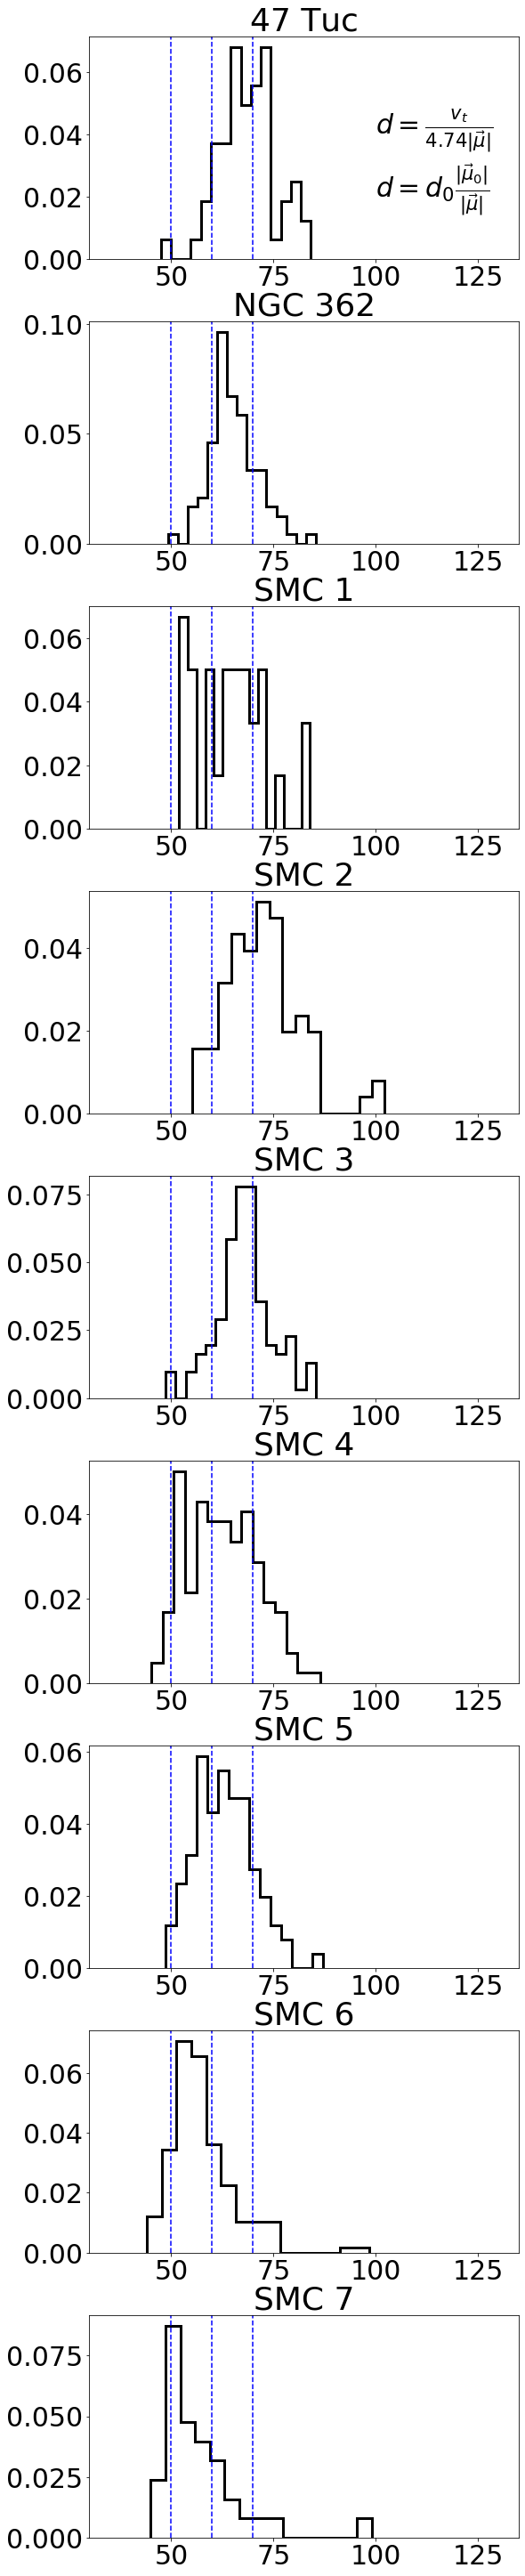

In [12]:
dist_list = [tuc47dis,n362dis,smc1dis,smc2dis,smc3dis,smc4dis,smc5dis,smc6dis,smc7dis]
dist_label = ['47 Tuc','NGC 362','SMC 1','SMC 2','SMC 3','SMC 4','SMC 5','SMC 6','SMC 7']

fig,ax = plt.subplots(9,1,figsize=[8,40])

for i in range(len(ax)):
    ax[i].hist(dist_list[i],density=True,bins=15,histtype='step',lw=3.0,color='k',
               label='{}'.format(dist_label[i]))
    
#     ax[i].set_ylim(top=0.07)
    ax[i].set_xlim(30,135)
    
#     ax[i].legend(loc='upper right')
    ax[i].set_title(r'{}'.format(dist_label[i]))
    
    ax[i].axvline(50,ls='--',c='b')
    ax[i].axvline(60,ls='--',c='b')
    ax[i].axvline(70,ls='--',c='b')
    
    if i == 0:
        ax[i].text(100,0.04,r'$d = \frac{v_t}{4.74|\vec{\mu}|}$')
        ax[i].text(100,0.02,r'$d = d_0 \frac{|\vec{\mu}_0|}{|\vec{\mu}|}$')

plt.tight_layout(pad=0.)

# plt.savefig('disttan.pdf',bbox_inches='tight')
plt.show()

<font size='45'>
    <b>
        Ages
    </b>
</font>

In [13]:
def find_ages(z1,z2,z3):
#good good
    # #     x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x2cu
#     p = [9.38559303e+00,4.50640684e-02,-6.04245546e-02,-2.97525149e+00,1.89919586e-02,-5.42190398e-02,
#          1.09839708e-01,-5.88914872e-03,2.50980954e-02,8.74102230e-01,2.28289124e-02]
#     age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
#            p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)+p[10]*(z2**3))
    
    #x1,x2,x3,x12,x13,x23,x1sq,x2sq,x3sq,x2cu,x3cu
    p = [9.38631710e+00,4.57009017e-02,-5.98198867e-02,-2.99642242e+00,1.86921027e-02,-4.51165023e-02,
         1.10829968e-01,-5.93377185e-03,2.51457473e-02,7.98522275e-01,2.26643514e-02,4.00941011e-01]
    age = (p[0]+p[1]*z1+p[2]*z2+p[3]*z3+p[4]*np.multiply(z1,z2)+p[5]*np.multiply(z1,z3)+p[6]*np.multiply(z2,z3)+
           p[7]*(z1**2)+p[8]*(z2**2)+p[9]*(z3**2)+p[10]*(z2**3)+p[11]*(z3**3))

    return age

#calculate absolute mag
def absmag(magnitude,distance):
    '''
    - magnitude: apparent magnitude of star
    - distance: distance to star in kpc
    Calculate the absolute magnitude of star
    '''
    absm = []
    absm.append(magnitude-5.0*np.log10(distance*1000)+5.0)
    absm = np.squeeze(np.array(absm))
    return absm

def sal(MH,aM):
    '''
    Calculate the Salaris correction to the overall metallicity
    '''
    return MH + np.log(0.638*(10**(aM))+0.362)

In [14]:
### Get Solar Fractions
abd = {'C':8.39,'N':7.78,'O':8.66,'Mg':7.53,'Ca':6.31,'S':7.14,'Si':7.51,'Fe':7.45}
keys = list(abd.keys())

sol_2_H = []
for i in keys:
    sol_2_H.append(abd[i]-12.0)
    
sol_xm  = 10**np.asarray(sol_2_H)/sum(10**np.asarray(sol_2_H))

In [26]:
### PCA
from sklearn.decomposition import PCA, KernelPCA

age_dist = []

data = np.array([parsec['logTe'],parsec['Ksmag'],parsec['MH'],parsec['logg']]).T
pca_transform = PCA(n_components=3).fit(data)

for i in tqdm_notebook(range(len(smc_nobloop)),desc='Done?'):
    
    # temperature
    teff = smc_nobloop['TEFF'][i]
    teff_err = smc_nobloop['TEFF_ERR'][i]
    
    # photometry 
    ra = smc_nobloop['RA'][i]
    dec = smc_nobloop['DEC'][i]
    ks = smc_nobloop['K'][i]
    ks_err = smc_nobloop['K_ERR'][i]
    ak = smc_nobloop['AK_TARG'][i]
    distance = dis[i]
    distance_err = dis_err[i]
    
    # abundances
    mh = smc_nobloop['M_H'][i]
    mh_err = smc_nobloop['M_H_ERR'][i]
    cfe = smc_nobloop['C_FE'][i]
    cfe_err = smc_nobloop['C_FE_ERR'][i]
    nfe = smc_nobloop['N_FE'][i]
    nfe_err = smc_nobloop['N_FE_ERR'][i]
    feh = smc_nobloop['FE_H'][i]
    feh_err = smc_nobloop['FE_H_ERR'][i]
    
    # surface gravity
    lgg = smc_nobloop['LOGG'][i]
    lgg_err = smc_nobloop['LOGG_ERR'][i]
    
    noise_ages = []
    new = []
    for j in range(750):
       
        # calculate noisy temperature
        teff_new = util.add_noise(teff,teff_err) 
        lgteff_new = np.log10(teff_new)
    
        # Calculate noisy K magnitude
#         _, _, dist = afunc.LMCdisk_cart(ra,dec)

        dist_new = 60 #distance #util.add_noise(distance,distance_err)
        
        ks_new = util.add_noise(ks,ks_err)
            
        absK_new = absmag(ks_new,dist_new) - ak
            
        # Calculate noisy Salaris correction
        
        x_C_new = sol_xm[0]*10**(util.add_noise(cfe,cfe_err)+
                                 util.add_noise(feh,feh_err)-util.add_noise(mh,mh_err))
        x_N_new = sol_xm[1]*10**(util.add_noise(nfe,nfe_err)+
                                 util.add_noise(feh,feh_err)-util.add_noise(mh,mh_err))
        
        ffac_new = (x_C_new+x_N_new)/sum(sol_xm[0:2])
        
        mh_new = util.add_noise(mh,mh_err)
        
        # Calculate noisy surface gravity
        lgg_new = util.add_noise(lgg,lgg_err)
            
        # calculate noisy age
        new.append(np.array([lgteff_new,absK_new,sal(mh_new,ffac_new),lgg_new]))
        
    zs = pca_transform.transform(np.asarray(np.squeeze(new)))

    for l in range(len(zs)):
        noise_ages.append(find_ages(zs[l][0],zs[l][1],zs[l][2]))
    
    age_dist.append(noise_ages)

parages = [] 
devs = []
for k in tqdm_notebook(range(len(age_dist))):
    devs.append(util.mad(age_dist[k]))
    parages.append(np.median(age_dist[k]))

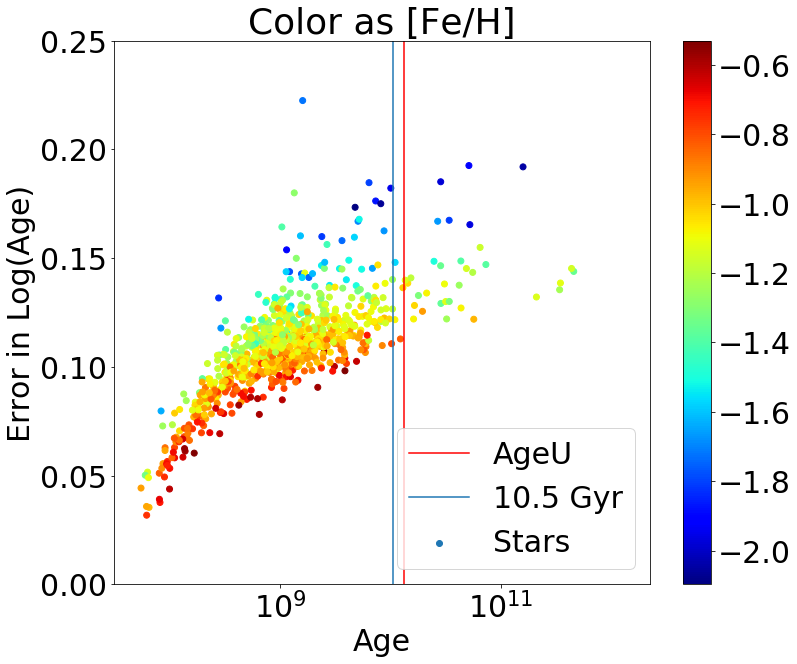

In [27]:
matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=[12,10])
plt.scatter(10**np.asarray(parages),devs,c=smc_nobloop['FE_H'],cmap='jet',label='Stars')
plt.colorbar()

plt.ylim(0,0.25)
plt.xlim(10**7.5,10**12.35)
plt.xscale('log')


plt.axvline(ageU,label='AgeU',c='r')
plt.axvline(10.5*10**9,label='10.5 Gyr')

plt.legend()

plt.title(r'Color as [Fe/H]')
plt.xlabel(r'Age')
plt.ylabel(r'Error in Log(Age)')

# plt.savefig('age_err.pdf',bbox_inches='tight')
plt.show()

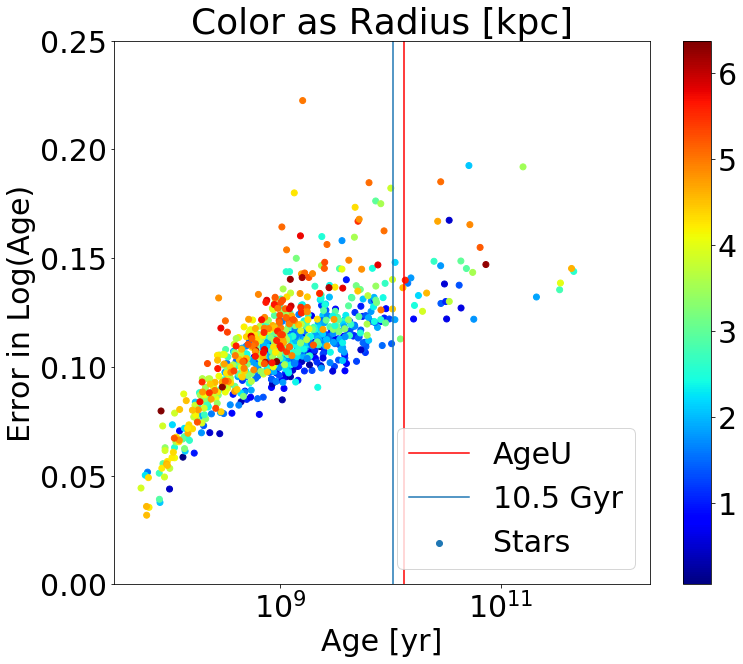

In [28]:
matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=[12,10])
plt.scatter(10**np.asarray(parages),devs,c=smc_nobloop['SMCRAD']*1.05,cmap='jet',label='Stars')
plt.colorbar()

plt.ylim(0,0.25)
plt.xlim(10**7.5,10**12.35)
plt.xscale('log')


plt.axvline(ageU,label='AgeU',c='r')
plt.axvline(10.5*10**9,label='10.5 Gyr')

plt.legend()

plt.title(r'Color as Radius [kpc]')
plt.xlabel(r'Age [yr]')
plt.ylabel(r'Error in Log(Age)')

# plt.savefig('age_err.pdf',bbox_inches='tight')
plt.show()

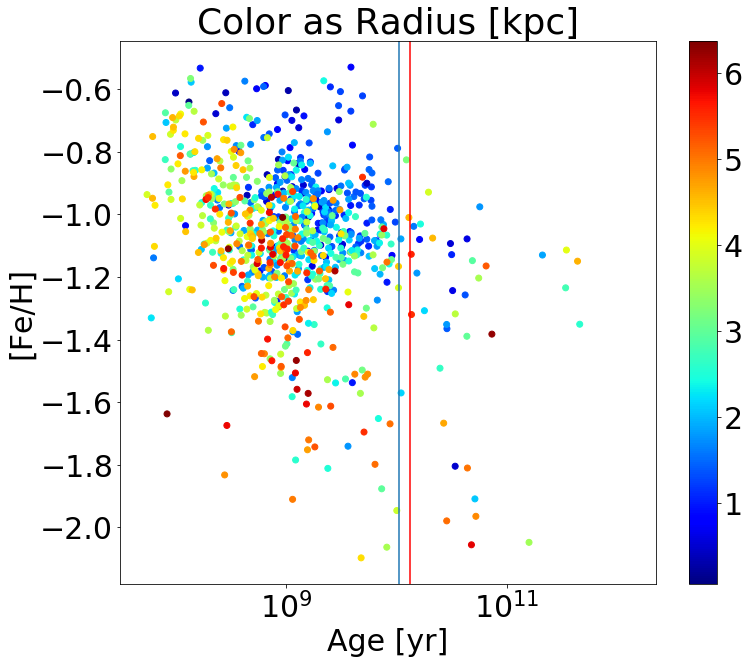

In [29]:
matplotlib.rcParams.update({'font.size': 30})
plt.figure(figsize=[12,10])
plt.scatter(10**np.asarray(parages),smc_nobloop['FE_H'],c=smc_nobloop['SMCRAD']*1.05,cmap='jet',label='Stars')
plt.colorbar()

# plt.ylim(0,0.25)
plt.xlim(10**7.5,10**12.35)
plt.xscale('log')


plt.axvline(ageU,label='AgeU',c='r')
plt.axvline(10.5*10**9,label='10.5 Gyr')

# plt.legend()

plt.title(r'Color as Radius [kpc]')
plt.xlabel(r'Age [yr]')
plt.ylabel(r'[Fe/H]')

# plt.savefig('age_err.pdf',bbox_inches='tight')
plt.show()